In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df= pd.read_csv("/content/customer_booking.csv", encoding='latin-1')

Accuracy: 0.86


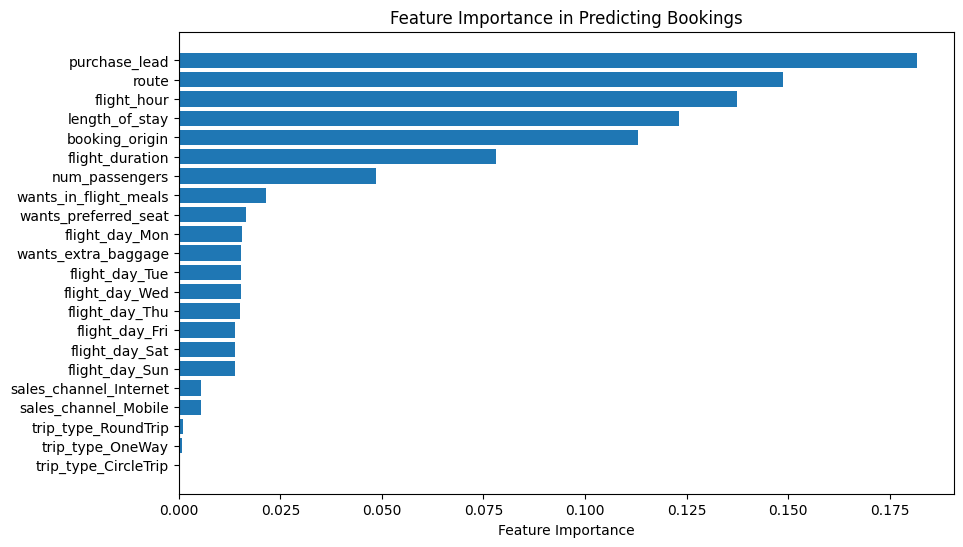

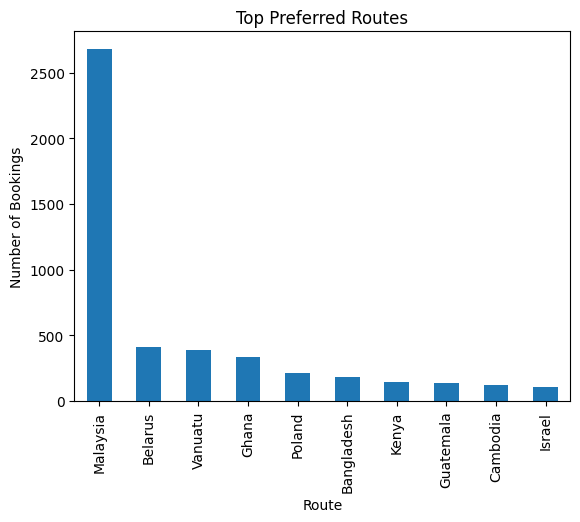

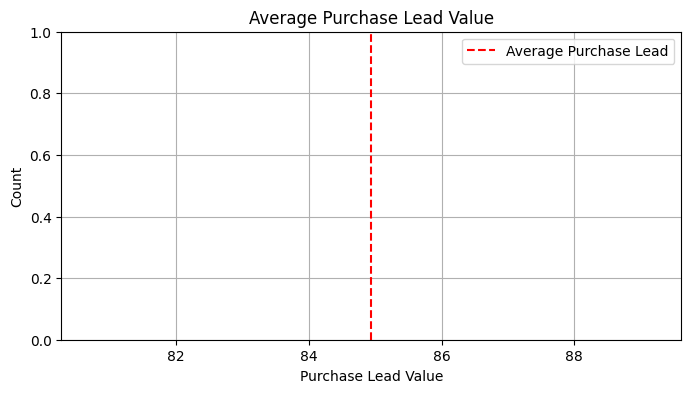

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")

# Create a reverse mapping dictionary to map integers back to strings for 'route'
int_to_string_mapping = {index: string for string, index in string_to_int_mapping.items()}

# Extract the column you want to map to unique numeric values
column_to_map = df['route']

# Create a mapping dictionary to map unique strings to integers
unique_strings = column_to_map.unique()
string_to_int_mapping = {string: index for index, string in enumerate(unique_strings)}

# Map the values in the column to integers using the mapping dictionary
df['route'] = df['route'].map(string_to_int_mapping)

# Extract the column you want to map to unique numeric values
column_to_map = df['booking_origin']

# Create a mapping dictionary to map unique strings to integers
unique_strings = column_to_map.unique()
string_to_int_mapping = {string: index for index, string in enumerate(unique_strings)}

# Map the values in the column to integers using the mapping dictionary
df['booking_origin'] = df['booking_origin'].map(string_to_int_mapping)

# Encode categorical features
categorical_columns = ['flight_day', 'sales_channel', 'trip_type']

# Perform one-hot encoding for categorical features
df = pd.get_dummies(df, columns=categorical_columns)

# Separate features and target variable
X = df.drop('booking_complete', axis=1)  # Features (exclude the target variable)
y = df['booking_complete']  # Target variable

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Predicting Bookings')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

# Convert the 'route' values back to strings for display
df['route'] = df['route'].map(int_to_string_mapping)

route_counts = df['route'].value_counts()
top_routes = route_counts.head(10)  # Change the number to display more or fewer routes
top_routes.plot(kind='bar')
plt.xlabel('Route')
plt.ylabel('Number of Bookings')
plt.title('Top Preferred Routes')
plt.show()

# Calculate the average purchase_lead value
average_purchase_lead = df['purchase_lead'].mean()

# Create a horizontal line plot to visualize the average purchase_lead
plt.figure(figsize=(8, 4))
plt.axvline(x=average_purchase_lead, color='red', linestyle='--', label='Average Purchase Lead')
plt.xlabel('Purchase Lead Value')
plt.ylabel('Count')
plt.title('Average Purchase Lead Value')
plt.legend()
plt.grid(True)
plt.show()